## Import Relevent Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

## 1. Data Collection

In [2]:
raw_data = pd.read_csv("creditcard.csv", index_col = None)

In [3]:
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data = raw_data

## 2. Data Preprocessing

### Informations of the Data

In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for the Data Types

In [7]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Check for the Null Values

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Cheack for No of classes and Unique value counts

In [10]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### For both Normal & Fraud Transactions

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check for the Duplicates

In [12]:
data.duplicated().any()

True

In [13]:
data.duplicated().sum()

1081

In [14]:
data.shape

(284807, 31)

### Delete the Duplicates

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().any()

False

In [17]:
data.shape

(283726, 31)

In [18]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

#### --> Highly Imbalanced Data 
- 0 -> Normal Trasaction
- 1 -> Fraud Transaction

### Precentage of Normal Transaction = 99.6%

In [20]:
283253/284315

0.996264706399592

### Percentage of Fraud Transaction = 0.16%

In [21]:
473/284315

0.0016636477146826584

### Creating 2 dataframes seperately for Normal & Fraud Transactions

In [22]:
Normal = data[data['Class'] == 0]
Fraud  = data[data['Class'] == 1]

In [23]:
Normal.shape

(283253, 31)

In [24]:
Fraud.shape

(473, 31)

### Statistical Measures for Normal Transactions based on their Amount

In [25]:
Normal[['Time','Amount']].describe()

,Time,Amount
count,283253.000000,283253.000000
mean,94835.058093,88.413575
std,47475.550607,250.379023
min,0.000000,0.000000
25%,54233.000000,5.670000
50%,84711.000000,22.000000
75%,139308.000000,77.460000
max,172792.000000,25691.160000


### Statistical Measures for Normal Transactions based on their Amount

In [26]:
Fraud[['Time','Amount']].describe()

,Time,Amount
count,473.000000,473.000000
mean,80450.513742,123.871860
std,48636.179973,260.211041
min,406.000000,0.000000
25%,41203.000000,1.000000
50%,73408.000000,9.820000
75%,129095.000000,105.890000
max,170348.000000,2125.870000


In [27]:
### 0 Amount Transactions

In [28]:
zero_transactions = data[data['Amount'] == 0]

In [29]:
zero_transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


### Checking for Fraud numbers among Zero Transactions

In [30]:
fraud_zero_transactions = zero_transactions[zero_transactions['Class'] == 1]

In [31]:
fraud_zero_transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.0,1
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.0,1
93486,64443.0,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,...,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.0,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.0,1
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.0,1
154587,102114.0,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,...,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,0.0,1


## 3. Exploratory Data Anlysis

### Q1) What is the distribution of Normal & Fraud Transactions?

<Axes: xlabel='Class', ylabel='count'>

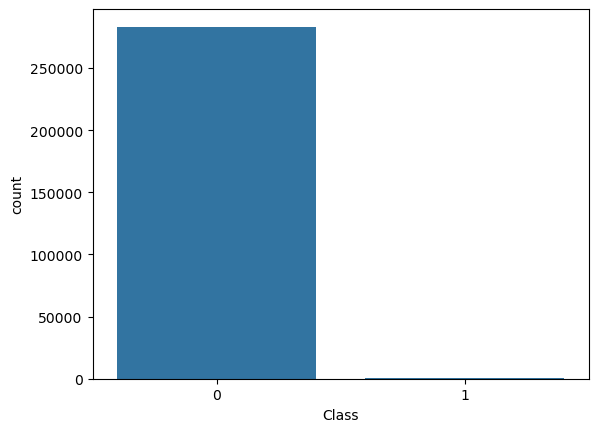

In [32]:
sb.countplot(x = 'Class', data=data)
#  0 -> Normal Transaction
#  1 -> Fraud Transaction

### Q2) What are the statistical properties of Normal Transactions?

In [33]:
Normal_df= pd.DataFrame(index = ['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR','1.5-Rule',
                           'Lesser Outlier','Greater Outlier','Min','Max','Skew','Kurtosis','Variance','STD'], columns = Normal.columns)


In [34]:
Normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [35]:
for column in Normal.columns:
    Normal_df[column]['Mean'] = Normal[column].mean()
    Normal_df[column]['Median'] = Normal[column].median()
    Normal_df[column]['Mode'] = Normal[column].mode()[0]
    Normal_df[column]['Q1:25%'] = Normal.describe()[column]['25%']
    Normal_df[column]['Q2:50%'] = Normal.describe()[column]['50%']
    Normal_df[column]['Q3:75%'] = Normal.describe()[column]['75%']
    Normal_df[column]['99%'] = np.percentile(Normal[column],99)
    Normal_df[column]['Q4:100%'] = Normal.describe()[column]['max']
    Normal_df[column]['IQR'] = Normal_df[column]['Q3:75%'] - Normal_df[column]['Q1:25%']
    Normal_df[column]['1.5-Rule'] = 1.5 * Normal_df[column]['IQR']
    Normal_df[column]['Lesser Outlier'] = Normal_df[column]['Q1:25%'] - Normal_df[column]['1.5-Rule']
    Normal_df[column]['Greater Outlier'] = Normal_df[column]['Q3:75%'] + Normal_df[column]['1.5-Rule']
    Normal_df[column]['Min'] = Normal[column].min()
    Normal_df[column]['Max'] = Normal[column].max()
    Normal_df[column]['Skew'] = Normal[column].skew()
    Normal_df[column]['Kurtosis'] = Normal[column].kurtosis()
    Normal_df[column]['Variance'] = Normal[column].var()
    Normal_df[column]['STD'] = Normal[column].std()
    

C:\Users\priya\AppData\Local\Temp\ipykernel_15288\1883931976.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Normal_df[column]['Mean'] = Normal[column].mean()
C:\Users\priya\AppData\Local\Temp\ipykernel_15288\1883931976.py:3: FutureWarni

In [36]:
Normal_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Mean,94835.058093,0.013439,-0.009829,0.012853,-0.01044,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.00115,-0.00016,0.00036,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
Median,84711.0,0.022562,0.062561,0.182247,-0.0245,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.01619,-0.052293,0.001368,0.011238,22.0,0.0
Mode,3767.0,1.245674,-0.326668,-2.752041,-0.842316,-0.562777,-1.011073,-0.432126,-0.160211,0.170362,...,-0.262581,-0.816264,0.020675,0.357827,0.186423,-0.398828,-0.035866,-0.060282,1.0,0
Q1:25%,54233.0,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.16149,-0.354306,-0.317476,-0.326853,-0.07065,-0.052808,5.67,0.0
Q2:50%,84711.0,0.022562,0.062561,0.182247,-0.0245,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.01619,-0.052293,0.001368,0.011238,22.0,0.0
Q3:75%,139308.0,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.18547,0.528136,0.147633,0.440051,0.35049,0.240023,0.09076,0.077961,77.46,0.0
99%,170560.48,2.237384,3.686864,2.726271,4.19399,3.42285,4.199915,2.679294,2.005558,2.97762,...,1.896743,1.528481,1.5041,1.063818,1.200708,1.158835,0.91466,0.53128,1018.0576,0.0
Q4:100%,172792.0,2.45493,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.50309,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,0.0
IQR,85075.0,2.23022,1.39841,1.912228,1.585836,1.300329,1.16522,1.121175,0.533313,1.238617,...,0.413876,1.070872,0.309123,0.794357,0.667966,0.566875,0.16141,0.130768,71.79,0.0
1.5-Rule,127612.5,3.345329,2.097615,2.868341,2.378754,1.950494,1.74783,1.681763,0.79997,1.857926,...,0.620814,1.606309,0.463685,1.191536,1.001949,0.850313,0.242116,0.196153,107.685,0.0


In [37]:
Normal_df[['Time','Amount']]

,Time,Amount
Mean,94835.058093,88.413575
Median,84711.0,22.0
Mode,3767.0,1.0
Q1:25%,54233.0,5.67
Q2:50%,84711.0,22.0
Q3:75%,139308.0,77.46
99%,170560.48,1018.0576
Q4:100%,172792.0,25691.16
IQR,85075.0,71.79
1.5-Rule,127612.5,107.685


### Q2) What are the statistical properties of Fraud Transactions?

In [38]:
Fraud_df = pd.DataFrame(index = ['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR','1.5-Rule',
                           'Lesser Outlier','Greater Outlier','Min','Max','Skew','Kurtosis','Variance','STD'], columns = Fraud.columns)

In [39]:
Fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [40]:
for column in Fraud.columns:
    Fraud_df[column]['Mean'] = Fraud[column].mean()
    Fraud_df[column]['Median'] = Fraud[column].median()
    Fraud_df[column]['Mode'] = Fraud[column].mode()[0]
    Fraud_df[column]['Q1:25%'] = Fraud.describe()[column]['25%']
    Fraud_df[column]['Q2:50%'] = Fraud.describe()[column]['50%']
    Fraud_df[column]['Q3:75%'] = Fraud.describe()[column]['75%']
    Fraud_df[column]['99%'] = np.percentile(Fraud[column],99)
    Fraud_df[column]['Q4:100%'] = Fraud.describe()[column]['max']
    Fraud_df[column]['IQR'] = Fraud_df[column]['Q3:75%'] - Fraud_df[column]['Q1:25%']
    Fraud_df[column]['1.5-Rule'] = 1.5 * Fraud_df[column]['IQR']
    Fraud_df[column]['Lesser Outlier'] = Fraud_df[column]['Q1:25%'] - Fraud_df[column]['1.5-Rule']
    Fraud_df[column]['Greater Outlier'] = Fraud_df[column]['Q3:75%'] + Fraud_df[column]['1.5-Rule']
    Fraud_df[column]['Min'] = Fraud[column].min()
    Fraud_df[column]['Max'] = Fraud[column].max()
    Fraud_df[column]['Skew'] = Fraud[column].skew()
    Fraud_df[column]['Kurtosis'] = Fraud[column].kurtosis()
    Fraud_df[column]['Variance'] = Fraud[column].var()
    Fraud_df[column]['STD'] = Fraud[column].std()

C:\Users\priya\AppData\Local\Temp\ipykernel_15288\1175417764.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Fraud_df[column]['Mean'] = Fraud[column].mean()
C:\Users\priya\AppData\Local\Temp\ipykernel_15288\1175417764.py:3: FutureWarning

In [41]:
Fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Mean,80450.513742,-4.49828,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.07827,123.87186,1.0
Median,73408.0,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.82,1.0
Mode,84204.0,-30.55238,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.86929,1.0,1
Q1:25%,41203.0,-5.60369,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.79676,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.0,1.0
Q2:50%,73408.0,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.82,1.0
Q3:75%,129095.0,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.28203,0.463827,0.395528,0.821048,0.372393,105.89,1.0
99%,167843.12,1.92262,16.553573,1.2325,11.850572,4.831355,3.697342,3.273209,18.022807,1.576987,...,5.74592,3.656334,2.686191,0.833493,2.006468,1.169552,2.25009,1.422924,1364.1368,1.0
Q4:100%,170348.0,2.132386,22.057729,2.25021,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.46623,1.091435,2.208209,2.745261,3.052358,1.779364,2125.87,1.0
IQR,87892.0,5.242262,3.426362,5.755052,4.002274,4.539804,2.036797,6.082006,1.870935,3.008372,...,1.164759,1.138317,0.62954,0.718568,0.784138,0.658606,0.836599,0.469616,104.89,0.0
1.5-Rule,131838.0,7.863394,5.139543,8.632579,6.003411,6.809706,3.055196,9.123009,2.806403,4.512558,...,1.747138,1.707475,0.94431,1.077853,1.176207,0.987908,1.254899,0.704423,157.335,0.0


In [42]:
Fraud_df[['Time','Amount']]

,Time,Amount
Mean,80450.513742,123.87186
Median,73408.0,9.82
Mode,84204.0,1.0
Q1:25%,41203.0,1.0
Q2:50%,73408.0,9.82
Q3:75%,129095.0,105.89
99%,167843.12,1364.1368
Q4:100%,170348.0,2125.87
IQR,87892.0,104.89
1.5-Rule,131838.0,157.335


### Q3) What is the distributions of Fraud & Normal Transaction Amounts

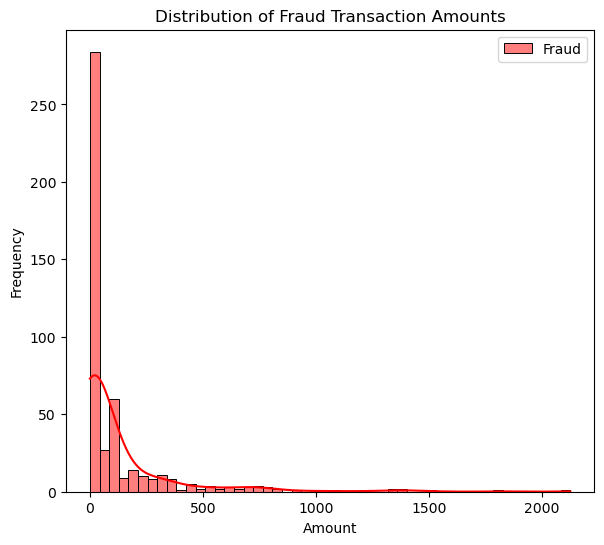

In [43]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

#sb.histplot(Normal['Amount'], bins=50, color='blue', kde=True, label='Normal')
sb.histplot(Fraud['Amount'], bins=50, color='red', kde=True, label='Fraud')
plt.title("Distribution of Fraud Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()

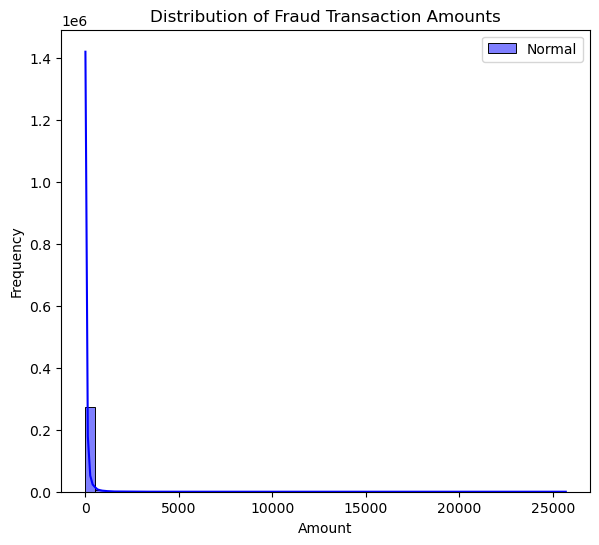

In [44]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

sb.histplot(Normal['Amount'], bins=50, color='blue', kde=True, label='Normal')
#sb.histplot(Fraud['Amount'], bins=50, color='red', kde=True, label='Fraud')
plt.title("Distribution of Fraud Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()

### Q5) Comparison of Fraud and Normal Transaction Amounts

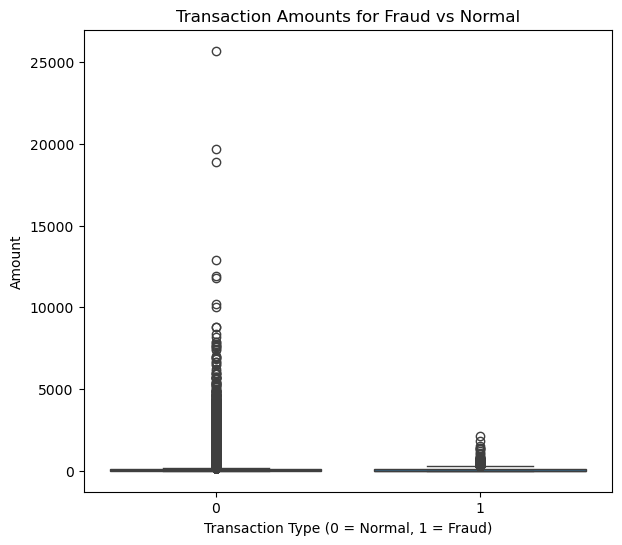

In [45]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)

sb.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amounts for Fraud vs Normal")
plt.xlabel("Transaction Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Amount")

plt.show()

### Q6) What is the probability of Fraud Transaction based on Time? 

3600 seconds = 1 hour

In [46]:
# Converting seconds to hours within 24 hours
data['Hour'] = (data['Time']/3600) % 24

In [47]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667


In [48]:
# Seperating Normal & Fraud Transaction 

normal_tran_hours = data[data['Class'] == 0]
fraud_tran_hours = data[data['Class'] == 1]

C:\Users\priya\AppData\Local\Temp\ipykernel_15288\3593848640.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(normal_tran_hours['Hour'], bins = 24, kde = True, label = 'Normal', color = 'blue')
C:\Users\priya\AppData\Local\Temp\ipykernel_15288\3593848640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

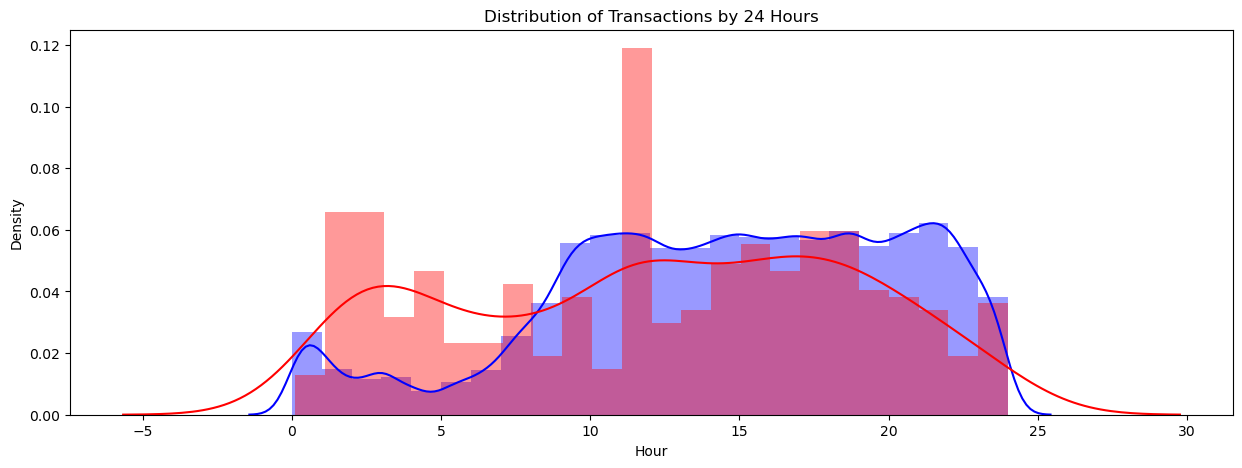

In [49]:
# Plot the distribution of transactions by hour for fraud and non-fraud

plt.figure(figsize = (15,5))
sb.distplot(normal_tran_hours['Hour'], bins = 24, kde = True, label = 'Normal', color = 'blue')
sb.distplot(fraud_tran_hours['Hour'], bins = 24, kde = True, label = 'Fraud', color = 'red')
plt.title("Distribution of Transactions by 24 Hours")
plt.xlable = ("Hours in 24")
plt.ylable = ("Tansaction Frequencies")
plt.show()

### Q7) What is the probability of Fraud Transaction based on Days? 

- 3600 seconds = 1 Hour
- 24 hours = 1 Day

- 24 hours * 3600 seconds per day ->  This calculates the total number of seconds in a day. 

- Multiplying these two gives 86400 seconds in a day.

#### 86400 Seconds = 1 Day

In [50]:
data['Day'] = data['Time'] // 86400

In [51]:
normal_tran_days = data[data['Class'] == 0]
fraud_tran_days = data[data['Class'] == 1]

C:\Users\priya\AppData\Local\Temp\ipykernel_15288\421672612.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(normal_tran_days['Day'], bins = int(data['Day'].max()), color = 'blue', kde = True, label = 'Normal')
C:\Users\priya\AppData\Local\Temp\ipykernel_15288\421672612.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

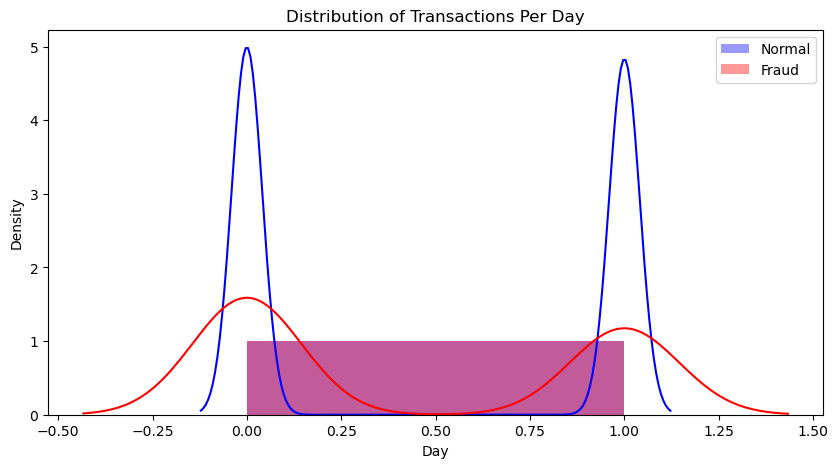

In [52]:
# Plot the distribution of transactions by Day for Normal & Fraud

plt.figure(figsize = (10,5))
sb.distplot(normal_tran_days['Day'], bins = int(data['Day'].max()), color = 'blue', kde = True, label = 'Normal')
sb.distplot(fraud_tran_days['Day'], bins = int(data['Day'].max()), color = 'red', kde = True, label = 'Fraud')
plt.title("Distribution of Transactions Per Day")
plt.xlable = ("Days")
plt.ylable = ("Tansaction Frequencies")
plt.legend()
plt.show()

In [53]:
# Both Time and Days doesn't make any meaning for further analysis

data.drop(['Time','Day'],axis = 1,inplace = True)

In [54]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667


### Q8) Are there any correlations among the Features, Especially for the Fraud Transactions ?

In [55]:
data_corr = data.corr()
data_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,...,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486,-0.005420
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,...,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624,0.007984
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,...,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322,-0.023075
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,...,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326,-0.035338
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,...,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812,-0.035866
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,...,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915,-0.019521
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,...,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347,-0.010446
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,...,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068,0.032841
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,...,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021,-0.192134
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,...,-0.000481,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971,0.022994


<Axes: >

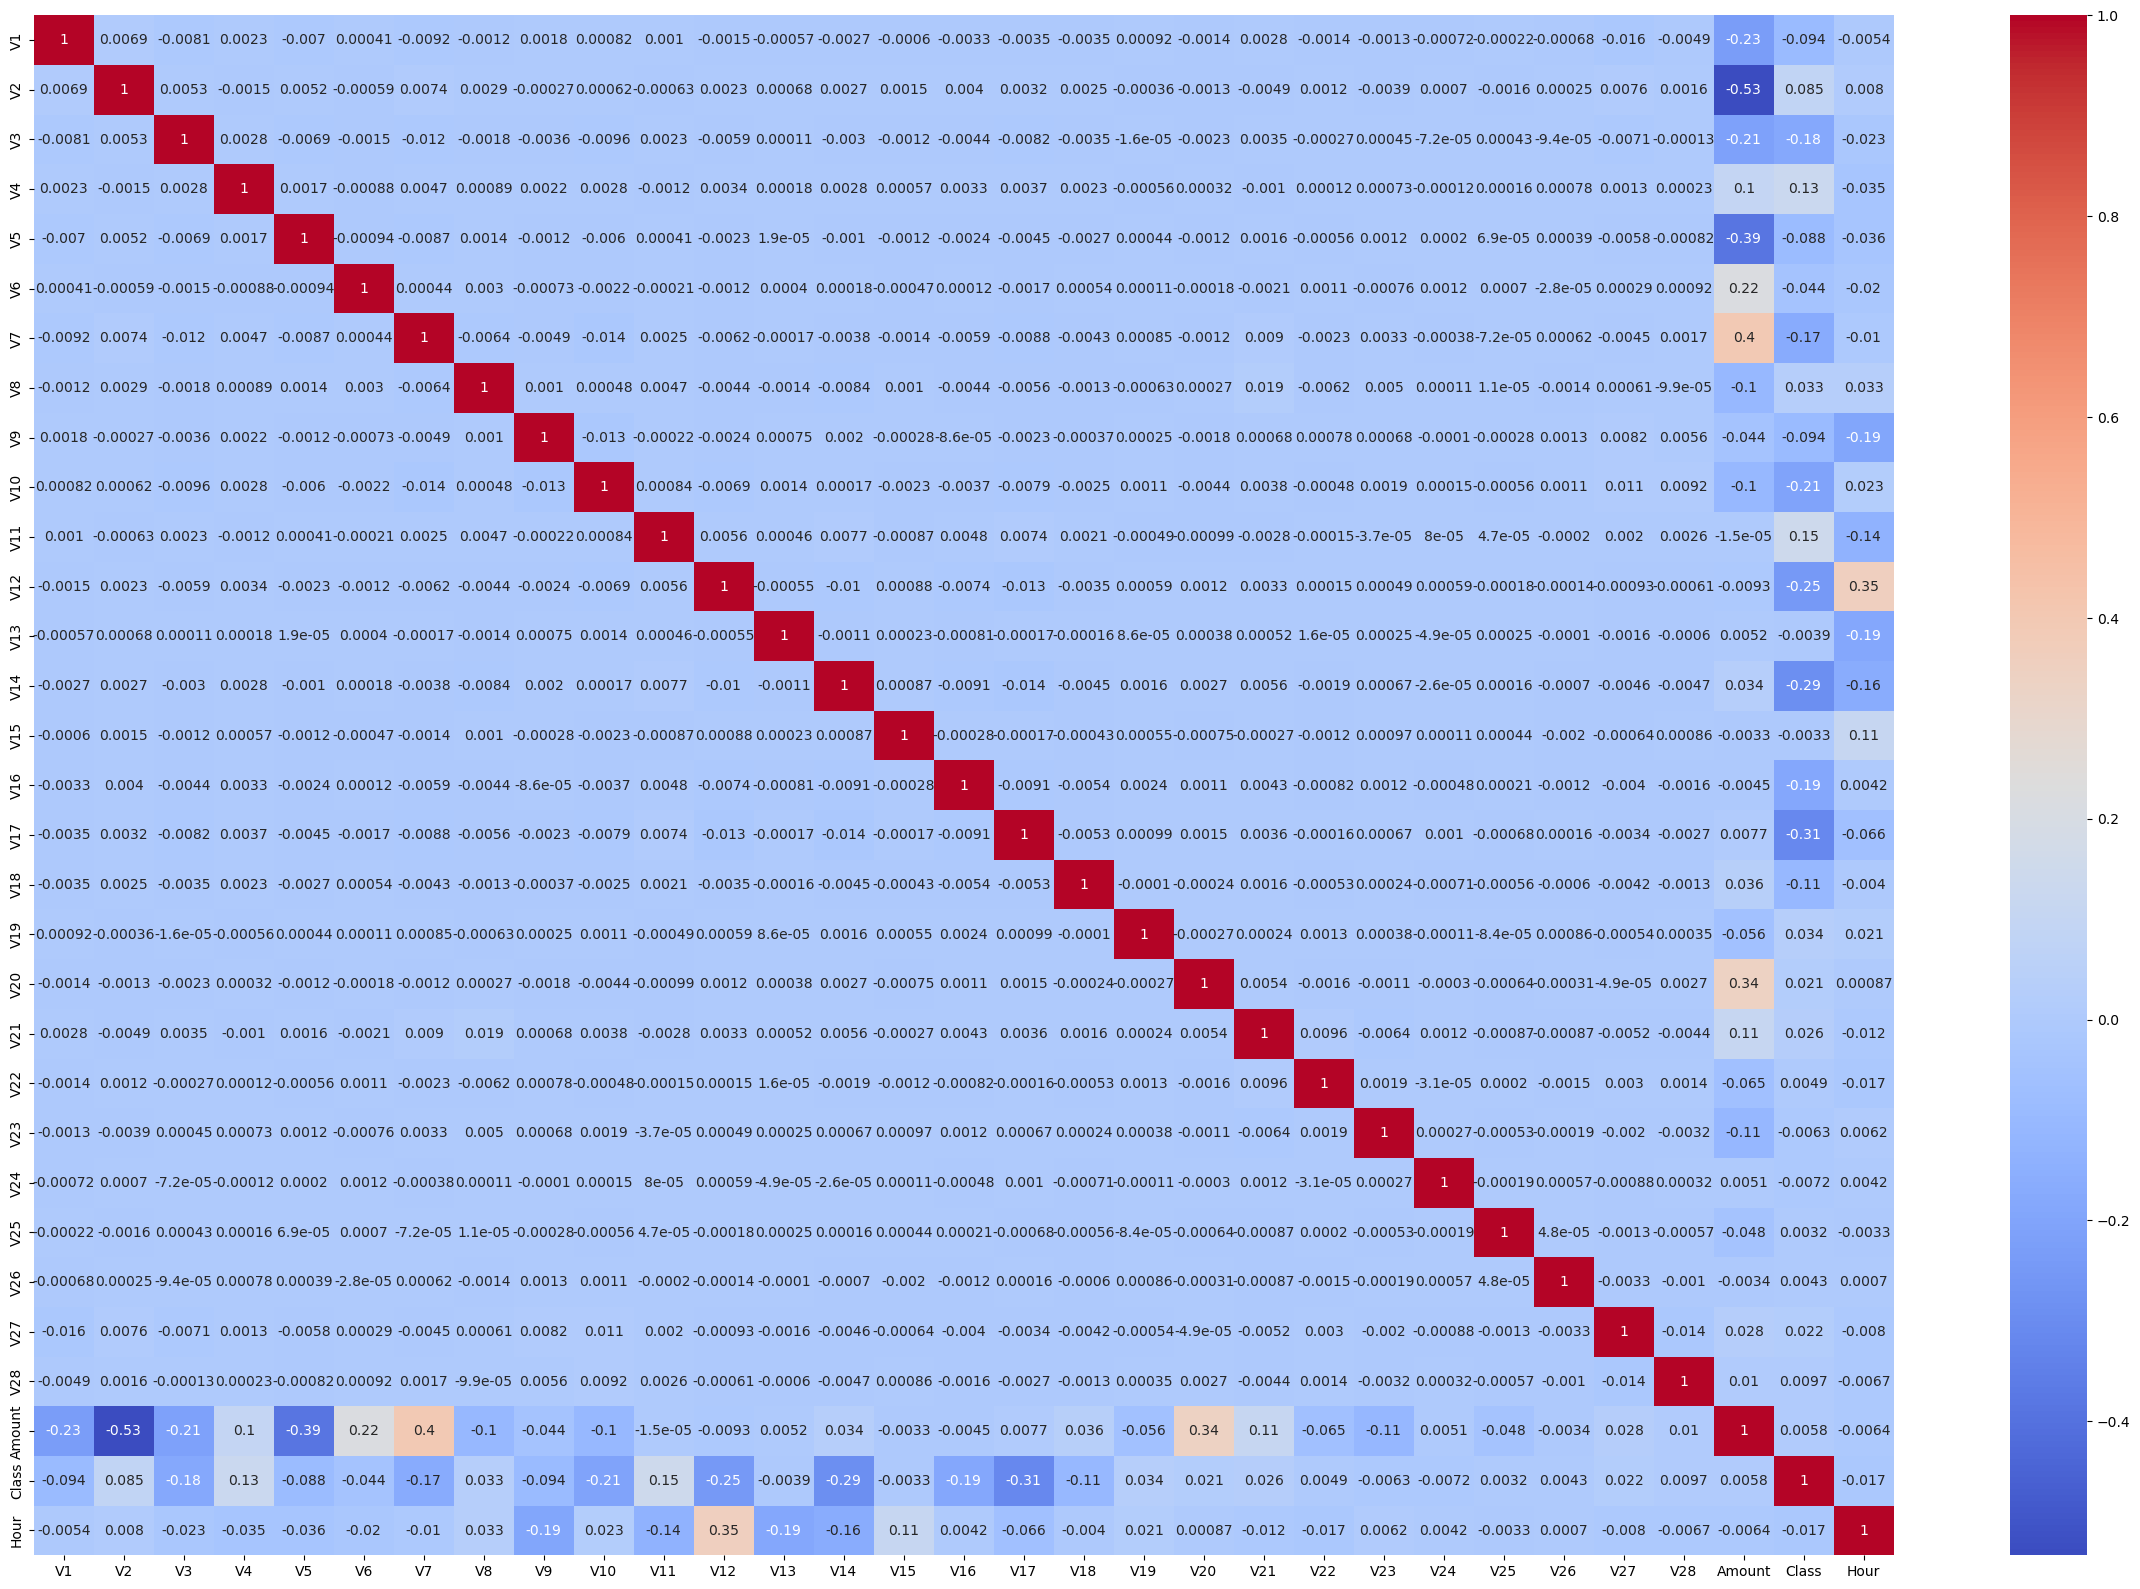

In [56]:
plt.figure(figsize=(30,20))
 
sb.heatmap(data_corr,annot =True, cmap = 'coolwarm')

In [57]:
Fraud_corr = Fraud.corr()

In [58]:
Fraud_corr = Fraud_corr.drop('Class', axis = 1&0)

<Axes: >

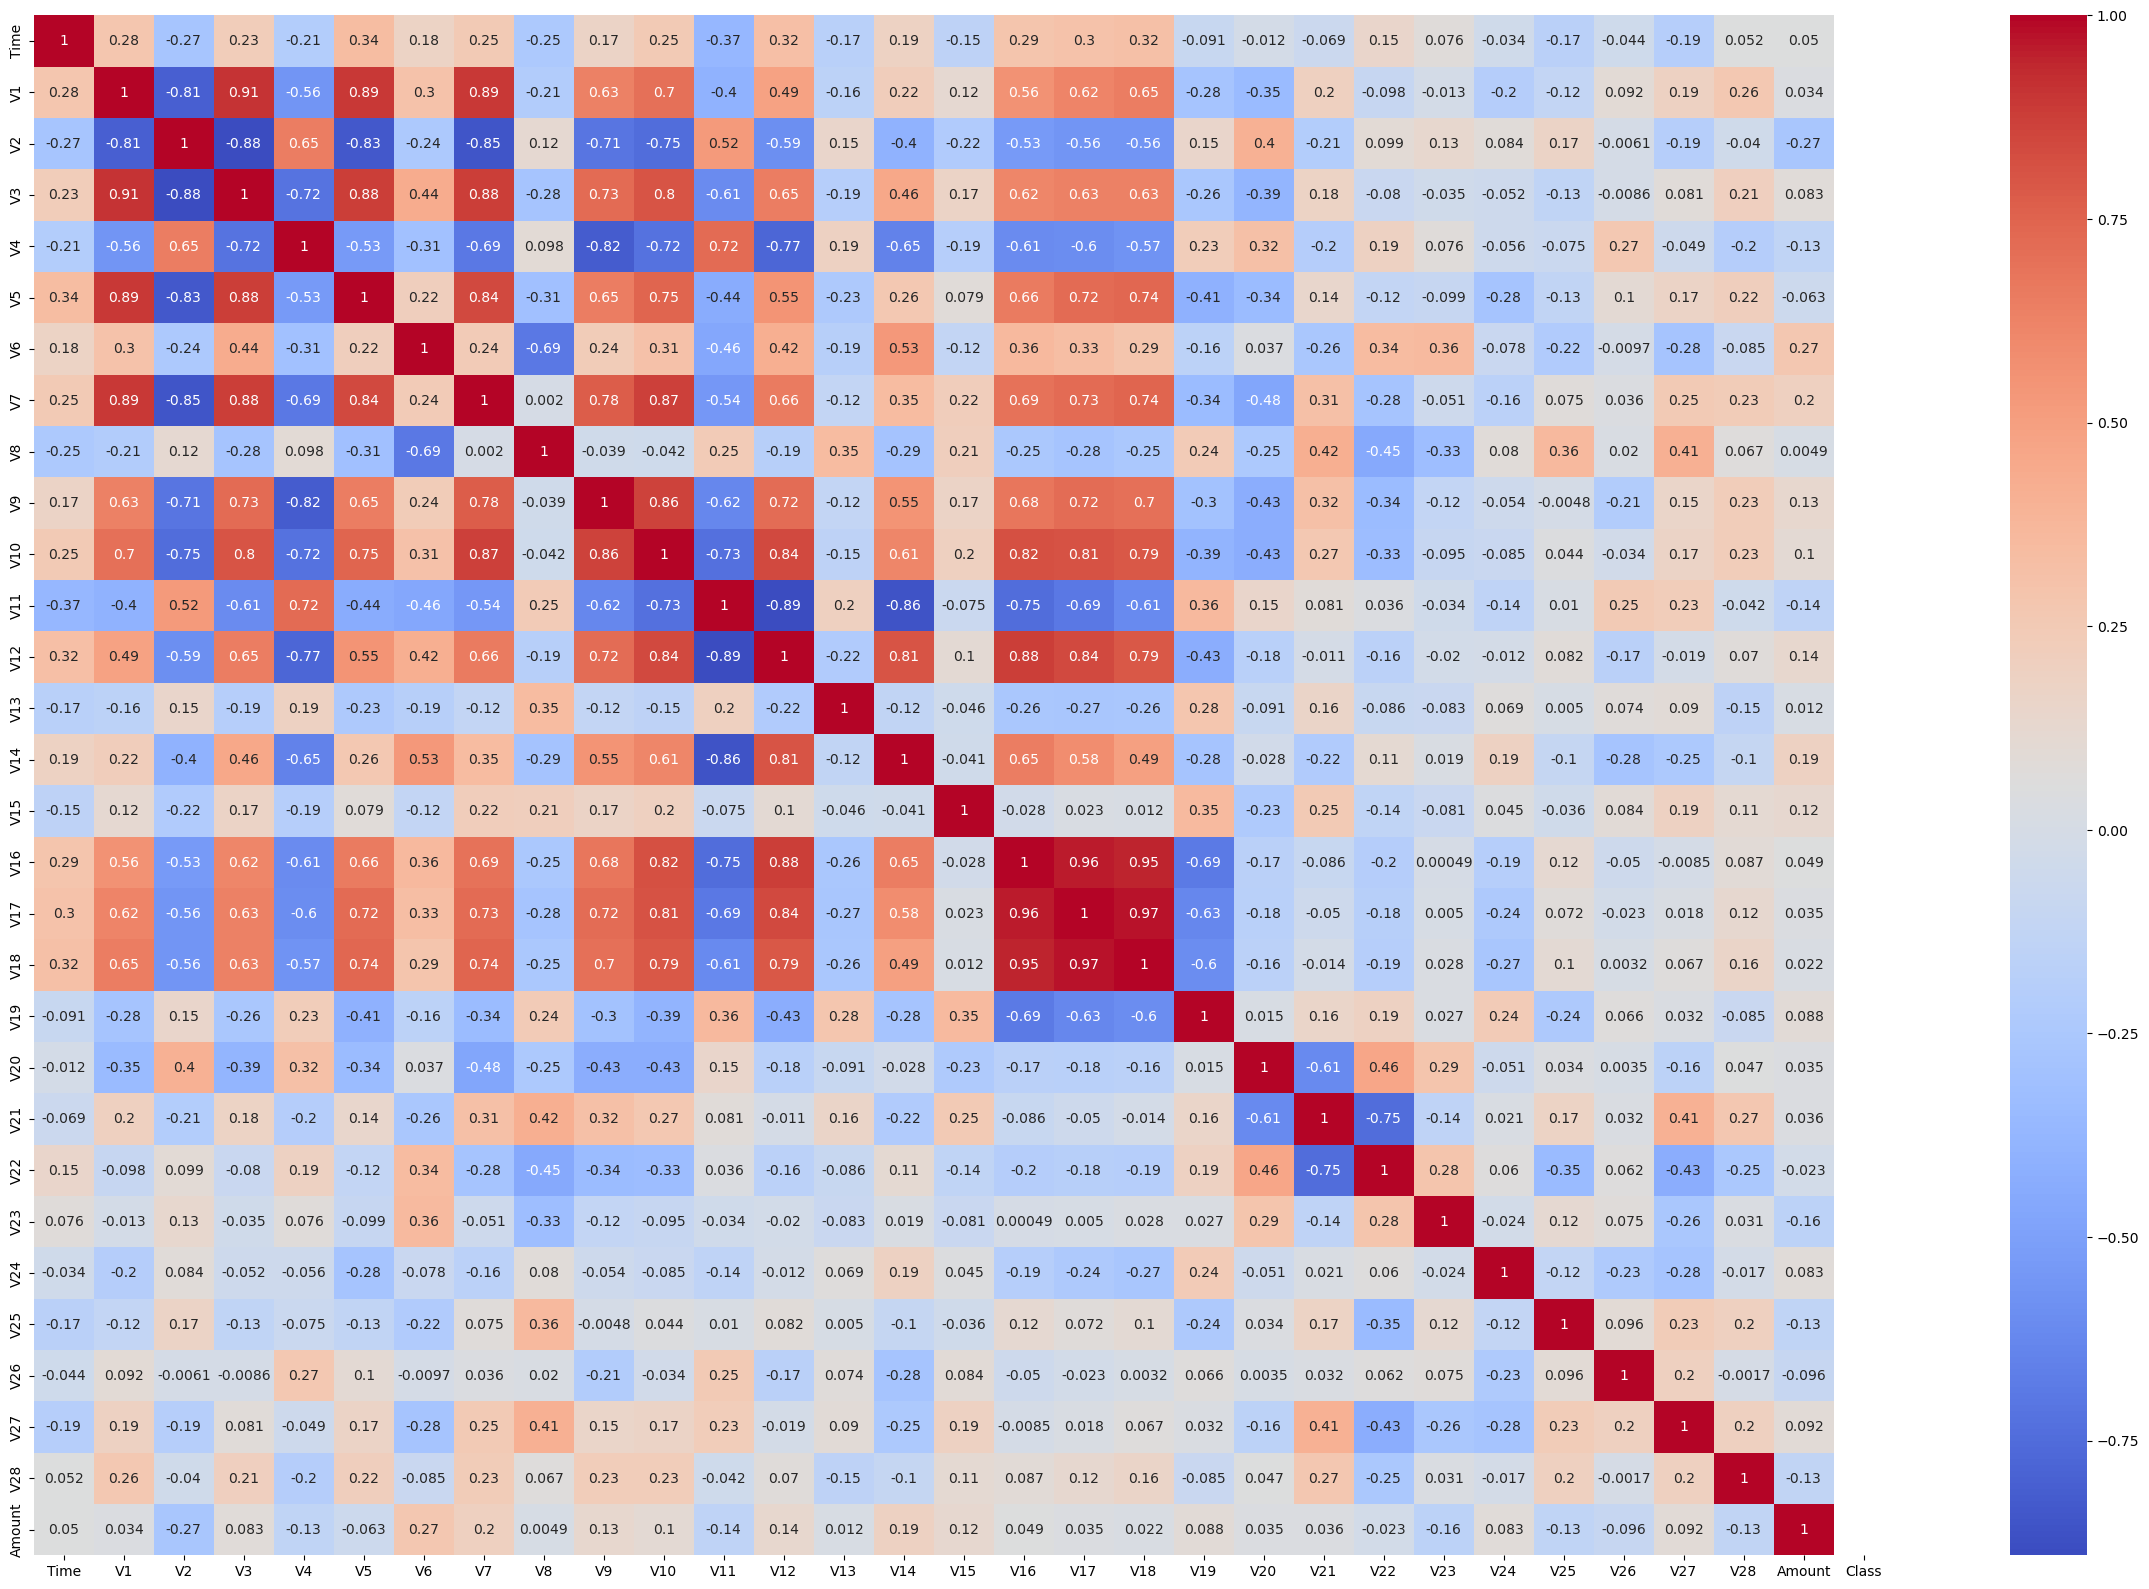

In [59]:
plt.figure(figsize=(30,20))
 
sb.heatmap(Fraud_corr,annot =True, cmap = 'coolwarm')

### Q9) What are the Top Features that differentiate Fraud from Normal Transactions?

In [60]:
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,...,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486,-0.005420
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,...,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624,0.007984
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,...,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322,-0.023075
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,...,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326,-0.035338
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,...,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812,-0.035866
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,...,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915,-0.019521
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,...,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347,-0.010446
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,...,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068,0.032841
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,...,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021,-0.192134
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,...,-0.000481,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971,0.022994


In [61]:
correlation = data.corr()['Class'].abs().sort_values(ascending=False)

# ['Class']: This selects the Class column from the correlation matrix, giving only the correlation values of each feature with Class
# (rather than the full matrix).

# .abs(): Takes the absolute values of these correlations. 
# This ensures that both positive and negative correlations are treated as equally strong in terms of their magnitude.


In [62]:
top_features_corr = correlation[1:15]  # Exclude 'Class' itself
print("Top features based on correlation with 'Class':")
top_features_corr.reset_index()

Top features based on correlation with 'Class':


,index,Class
0,V17,0.313498
1,V14,0.293375
2,V12,0.250711
3,V10,0.206971
4,V16,0.187186
5,V3,0.182322
6,V7,0.172347
7,V11,0.149067
8,V4,0.129326
9,V18,0.105340


### Q10) What is the distributions of each Feature?


In [63]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Hour'],
      dtype='object')

In [64]:
Normal_tran = data[data['Class'] == 0]
Fraud_tran = data[data['Class'] == 1]

ValueError: num must be an integer with 1 <= num <= 30, not 31

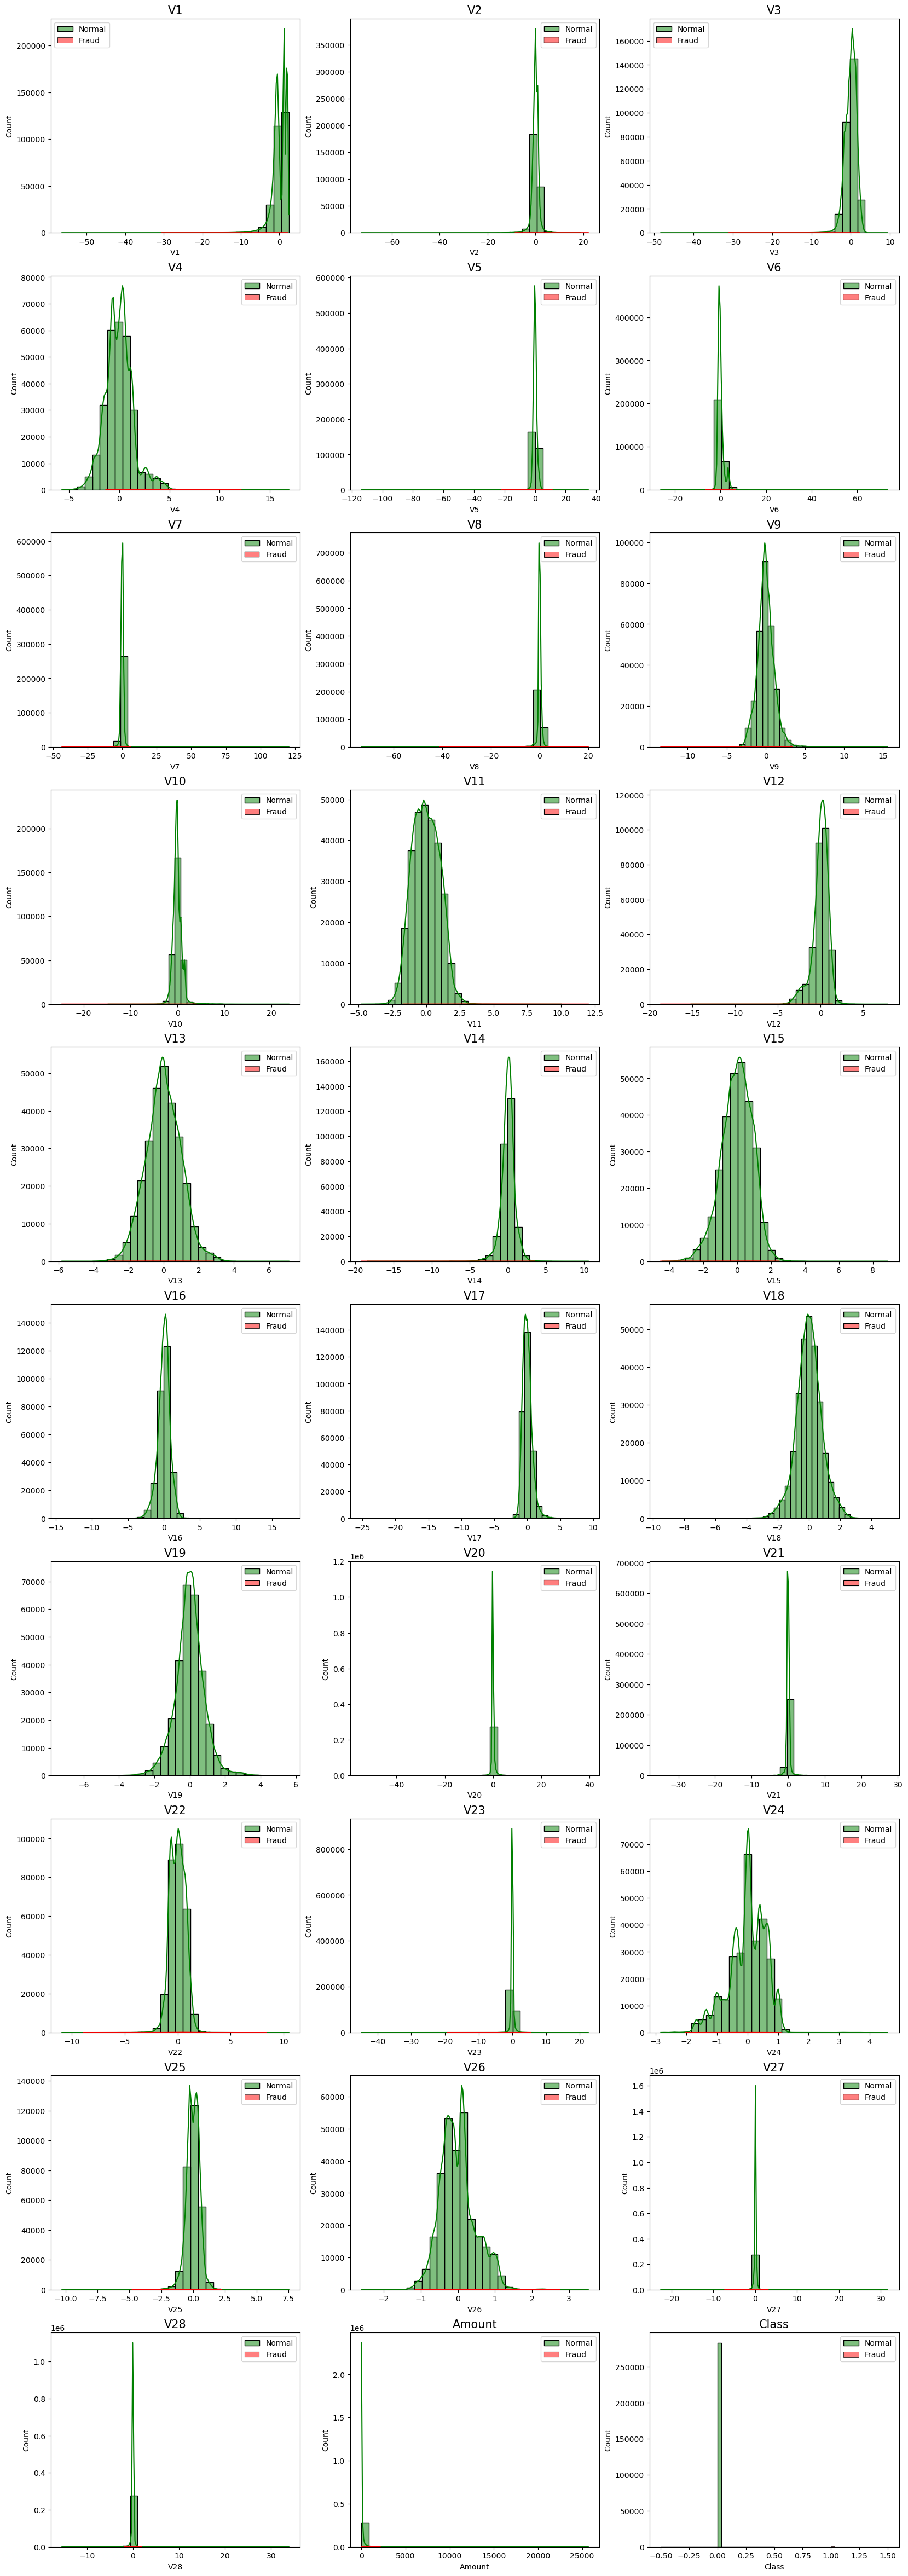

In [65]:
plt.figure(figsize=(20, 60))

for n, col in enumerate(data.columns):
    plt.subplot(10, 3, n + 1)  # Note: changed to plt.subplot and fixed the arguments
    sb.histplot(Normal_tran[col], color='green', kde=True, label='Normal', bins=30)
    sb.histplot(Fraud_tran[col], color='red', kde=True, label='Fraud', bins=30)
    plt.title(col, fontsize=15)
    plt.legend()

plt.tight_layout()
plt.show()

## 4. Resampling Technique
### Converting the Imbalanced data into Balanced data using Resampling Technique - SMOTE
### SMOTE - Synthetic Minority Oversampling Technique
This technique takes a long time to process, so the 'Random Undersampling' technique was chosen for time consumption.

In [66]:
#!pip install imbalanced-learn

## 4. Resampling Technique
### Random Under Sampling is used here 

- Build a sample dataset containing similar distrubutions of Normal & Fraud Transactions

In [67]:
Fraud_tran.shape

(473, 31)

In [68]:
Normal_tran.shape

(283253, 31)

### Before Random Under Sampling

In [69]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

- Converting the Imbalanced data to the Balanced data using the Random Under Sampling Technique to get better accuracy in the Machine Learning Model.


In [70]:
Normal_sample = Normal_tran.sample(n=473)

In [71]:
Normal_sample.shape

(473, 31)

In [72]:
Fraud_tran.shape

(473, 31)

In [73]:
# Concatinating 2 dataframes Row wise

new_data = pd.concat([Normal_sample,Fraud_tran], axis = 0)

In [74]:
new_data.shape

(946, 31)

In [75]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
77328,-0.374376,1.766374,-0.623695,0.529115,1.708753,-1.631841,1.893354,-0.868290,0.216714,-0.848973,...,0.119664,-0.123933,0.015197,-0.871873,-0.733713,-0.400182,-0.284680,1.61,0,15.833333
93201,-1.125908,0.425260,1.867083,1.512314,1.451017,0.353659,0.249718,0.318948,-0.774127,-0.176426,...,-0.638292,-0.068051,-0.810841,0.077306,-0.251053,0.066620,0.113117,7.83,0,17.859722
149813,-4.361938,4.354889,-2.714899,-2.081955,0.546045,-1.232279,1.288743,-0.112072,4.290846,5.174352,...,0.377496,0.013968,0.611181,0.613160,0.086184,2.302772,1.570224,8.76,0,1.554444
54637,1.239739,-0.075940,0.335985,0.249074,-0.463838,-0.401683,-0.203688,0.058486,0.351488,-0.032553,...,-0.633372,0.023685,0.013071,0.304668,0.452031,-0.054407,-0.005333,4.00,0,12.926667
280749,-0.687927,1.556863,-0.980203,-0.581539,0.454730,-0.964400,0.585490,0.345215,0.209720,-0.434046,...,-0.910365,0.159805,0.615824,-0.314710,0.121779,0.319362,0.131291,10.99,0,23.145556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22.983889
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23.040833
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23.041944
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23.212778


### After Random Under Sampling

In [76]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

### --> Data is Ready for the Feature Engineering & Model Creation

### Input & Ouput Split

In [77]:
indep_x = new_data.drop('Class', axis = 1)
dep_y = new_data['Class']

In [78]:
indep_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
77328,-0.374376,1.766374,-0.623695,0.529115,1.708753,-1.631841,1.893354,-0.868290,0.216714,-0.848973,...,-0.139744,0.119664,-0.123933,0.015197,-0.871873,-0.733713,-0.400182,-0.284680,1.61,15.833333
93201,-1.125908,0.425260,1.867083,1.512314,1.451017,0.353659,0.249718,0.318948,-0.774127,-0.176426,...,-0.175289,-0.638292,-0.068051,-0.810841,0.077306,-0.251053,0.066620,0.113117,7.83,17.859722
149813,-4.361938,4.354889,-2.714899,-2.081955,0.546045,-1.232279,1.288743,-0.112072,4.290846,5.174352,...,-0.442663,0.377496,0.013968,0.611181,0.613160,0.086184,2.302772,1.570224,8.76,1.554444
54637,1.239739,-0.075940,0.335985,0.249074,-0.463838,-0.401683,-0.203688,0.058486,0.351488,-0.032553,...,-0.230639,-0.633372,0.023685,0.013071,0.304668,0.452031,-0.054407,-0.005333,4.00,12.926667
280749,-0.687927,1.556863,-0.980203,-0.581539,0.454730,-0.964400,0.585490,0.345215,0.209720,-0.434046,...,-0.364201,-0.910365,0.159805,0.615824,-0.314710,0.121779,0.319362,0.131291,10.99,23.145556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,22.983889
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,23.040833
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,23.041944
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,23.212778


In [79]:
indep_x.shape

(946, 30)

In [80]:
dep_y.shape

(946,)

In [81]:
dep_y.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [82]:
def selectkbest(indep_x,dep_y,n):
    SK = SelectKBest(score_func = f_classif, k=n)
    SKfit = SK.fit(indep_x,dep_y)
    selectk_features = SKfit.transform(indep_x)
    selectk_indices = SKfit.get_support(indices=True)
    selectk_features_names = indep_x.columns[selectk_indices]
    return selectk_features, selectk_features_names.tolist()

In [83]:
def split_scaler(indep_x,dep_y):
    x_train,x_test,y_train,y_test = train_test_split(indep_x, dep_y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train,x_test,y_train,y_test,sc

In [84]:
def cm_prediction(Classifier,x_test,y_test):
    y_pred = Classifier.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    return Classifier,cm,accuracy,report,x_test,y_test

In [85]:
def logistic(x_train,y_train,x_test):
    Classifier = LogisticRegression(random_state=0)
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [86]:
def svm_linear(x_train,y_train,x_test):
    Classifier = SVC(kernel = 'linear',random_state=0)
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [87]:
def svm_nonlinear(x_train,y_train,x_test):
    Classifier = SVC(kernel = 'rbf',random_state=0)
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [88]:
def knn(x_train,y_train,x_test):
    Classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [89]:
def naive(x_train,y_train,x_test):
    Classifier = GaussianNB()
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [90]:
def decision(x_train,y_train,x_test):
    Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [91]:
def random(x_train,y_train,x_test):
    Classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [92]:
def selectk_classification(acclog,accsvm_l,accsvm_nl,accknn,accnav,accdc,accrf):
    selectk_dataframe = pd.DataFrame(index = ['F_Classif'], columns = ['Logistic','SVM_l','SVM_nl','KNN','Naive','Decision','Random'])
    for index in selectk_dataframe.index:
        selectk_dataframe['Logistic'][index] = acclog
        selectk_dataframe['SVM_l'][index] = accsvm_l
        selectk_dataframe['SVM_nl'][index] = accsvm_nl
        selectk_dataframe['KNN'][index] = accknn
        selectk_dataframe['Naive'][index] = accnav
        selectk_dataframe['Decision'][index] = accdc
        selectk_dataframe['Random'][index] = accrf
    return selectk_dataframe

## 5. Feature Selection & Model Creation

In [93]:
kbest,selected_features_names = selectkbest(indep_x,dep_y,5)

acclog = []
accsvm_l = []
accsvm_nl = []
accknn = []
accnav = []
accdc = []
accrf = []

In [94]:
kbest

array([[ 0.52911516, -0.84897348,  1.04848288, -1.57247032, -3.90178747],
       [ 1.5123142 , -0.17642624, -1.6551186 , -0.22310033, -0.25548303],
       [-2.08195524,  5.17435164,  2.16562218, -1.9790966 ,  1.07797455],
       ...,
       [ 0.46830839, -3.46389088,  1.79496897, -2.77502154, -4.05716238],
       [ 1.81709247, -5.24598384,  1.93351954, -5.0304648 , -6.41662798],
       [ 0.40866999, -0.88872168,  0.49114024,  0.72890332, -1.94888335]])

In [95]:
selected_features_names

['V4', 'V10', 'V11', 'V12', 'V14']

### Train & Test Split

In [96]:
x_train,x_test,y_train,y_test,sc = split_scaler(kbest,dep_y)

In [97]:
x_train.shape

(756, 5)

In [98]:
y_train.shape

(756,)

In [99]:
x_test.shape

(190, 5)

In [100]:
y_test.shape

(190,)

### Model Creation

In [101]:
Classifier,cm,accuracy,report,x_test,y_test = logistic(x_train,y_train,x_test)
acclog.append(accuracy)

Classifier,cm,accuracy,report,x_test,y_test = svm_linear(x_train,y_train,x_test)
accsvm_l.append(accuracy)

Classifier,cm,accuracy,report,x_test,y_test = svm_nonlinear(x_train,y_train,x_test)
accsvm_nl.append(accuracy)

Classifier,cm,accuracy,report,x_test,y_test = knn(x_train,y_train,x_test)
accknn.append(accuracy)

Classifier,cm,accuracy,report,x_test,y_test = naive(x_train,y_train,x_test)
accnav.append(accuracy)

Classifier,cm,accuracy,report,x_test,y_test = decision(x_train,y_train,x_test)
accdc.append(accuracy)

Classifier,cm,accuracy,report,x_test,y_test = random(x_train,y_train,x_test)
accrf.append(accuracy)


In [102]:
result = selectk_classification(acclog[0],accsvm_l[0],accsvm_nl[0],accknn[0],accnav[0],accdc[0],accrf[0])

C:\Users\priya\AppData\Local\Temp\ipykernel_15288\103160091.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  selectk_dataframe['Logistic'][index] = acclog
C:\Users\priya\AppData\Local\Temp\ipykernel_15288\103160091.py:5: FutureWarning: Ch

In [103]:
result
#5

,Logistic,SVM_l,SVM_nl,KNN,Naive,Decision,Random
F_Classif,0.936842,0.915789,0.921053,0.942105,0.921053,0.910526,0.926316


## 5. Final Model

### Logistic Regression gives better accuracy compared to all other algorithms.

In [122]:
### GridSearch for Logistic Regression Algorithm

params_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
               'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
               'multi_class': ['auto', 'ovr', 'multinomial']}

grid = GridSearchCV(LogisticRegression(), params_grid, refit=True, verbose=3, n_jobs=-1, scoring = 'f1_weighted' )
grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Anaconda3\envs\AIML\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
165 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\envs\AIML\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\envs\AIML\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\envs\AIML\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1_weighted', verbose=3)

#### Prediction

In [123]:
results = grid.cv_results_

grid_predictions = grid.predict(x_test)

cm = confusion_matrix(y_test,grid_predictions)
report = classification_report(y_test,grid_predictions)

#### Confusion Matix

In [124]:
print("Confusion Matrix:\n\n",cm)

Confusion Matrix:

 [[94  1]
 [11 84]]


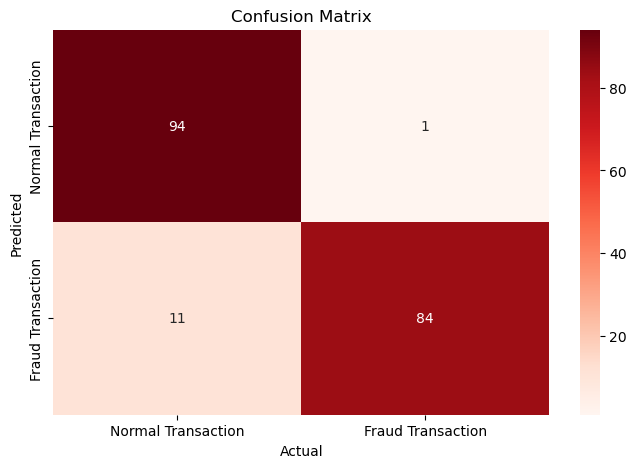

In [125]:
# Heatmap for the confusion Matrix

plt.figure(figsize=(8,5))

sb.heatmap(cm, cmap='Reds', annot=True,
          xticklabels = ['Normal Transaction','Fraud Transaction'],
          yticklabels = ['Normal Transaction','Fraud Transaction'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Classification Report

In [126]:
print("Classification Report:\n\n",report)

Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.88      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



#### Best Parameters & F1_score

In [127]:
# Best hyper tuning parameters for Logistic Regression 

f1_macro_ave = f1_score(y_test,grid_predictions, average='macro')

print("F1_score macro average of best paramerters {} :". format(grid.best_params_), f1_macro_ave)

F1_score macro average of best paramerters {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'} : 0.9366666666666666


#### ROC_AUC Score

In [128]:
ROC_score = roc_auc_score(y_test,grid.predict_proba(x_test)[:,1])
ROC_score

0.9878116343490305

### Table of GridSearch

In [129]:
Grid_table = pd.DataFrame(results)
Grid_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002368,0.000807,0.000000,0.000000,auto,l1,lbfgs,"{'multi_class': 'auto', 'penalty': 'l1', 'solv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
1,0.006681,0.000622,0.007234,0.000864,auto,l1,liblinear,"{'multi_class': 'auto', 'penalty': 'l1', 'solv...",0.947222,0.933653,0.933653,0.953602,0.906917,0.935009,0.016048,1
2,0.001754,0.000632,0.000000,0.000000,auto,l1,newton-cg,"{'multi_class': 'auto', 'penalty': 'l1', 'solv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
3,0.001822,0.000865,0.000000,0.000000,auto,l1,newton-cholesky,"{'multi_class': 'auto', 'penalty': 'l1', 'solv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
4,0.002424,0.000476,0.000000,0.000000,auto,l1,sag,"{'multi_class': 'auto', 'penalty': 'l1', 'solv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
5,0.036813,0.009440,0.011724,0.009297,auto,l1,saga,"{'multi_class': 'auto', 'penalty': 'l1', 'solv...",0.947222,0.933653,0.933653,0.953602,0.906917,0.935009,0.016048,1
6,0.021095,0.010024,0.008295,0.004185,auto,l2,lbfgs,"{'multi_class': 'auto', 'penalty': 'l2', 'solv...",0.947222,0.933653,0.933653,0.953602,0.906917,0.935009,0.016048,1
7,0.008951,0.002788,0.007138,0.003056,auto,l2,liblinear,"{'multi_class': 'auto', 'penalty': 'l2', 'solv...",0.947222,0.933653,0.926973,0.946950,0.906917,0.932343,0.014912,20
8,0.041544,0.013143,0.011983,0.004605,auto,l2,newton-cg,"{'multi_class': 'auto', 'penalty': 'l2', 'solv...",0.947222,0.933653,0.933653,0.953602,0.906917,0.935009,0.016048,1
9,0.043602,0.009748,0.013192,0.003376,auto,l2,newton-cholesky,"{'multi_class': 'auto', 'penalty': 'l2', 'solv...",0.947222,0.933653,0.933653,0.953602,0.906917,0.935009,0.016048,1


In [130]:
selected_features_names

['V4', 'V10', 'V11', 'V12', 'V14']

### Save the best Model

In [131]:
filename = 'Credit_Card_Fraud_Detection_Model.sav'
pickle.dump(grid,open(filename,'wb'))

In [132]:
filenameSC = 'sc.pkl'
pickle.dump(sc,open(filenameSC,'wb'))

### Load the Model

In [133]:
sc = pickle.load(open('sc.pkl','rb'))

In [134]:
user_input = sc.transform([[0.749,0.559,1.256,0.254,1.369]])
user_input

array([[-0.49414733,  0.75228893, -0.21774638,  0.7229427 ,  1.0314482 ]])

In [135]:
loaded_model = pickle.load(open('Credit_Card_Fraud_Detection_Model.sav','rb'))
Prediction = loaded_model.predict(user_input)

### Future Prediction Numerical

In [136]:
Prediction

array([0], dtype=int64)

### Future Prediction categorical

In [137]:
def get_categorical_prediction(Prediction):
    return 'Normal Transaction' if Prediction == 0 else 'Fraud Transaction'

In [138]:
Future_Prediction_categorical = get_categorical_prediction(Prediction)
Future_Prediction_categorical

'Normal Transaction'